In [1]:
import pandas as pd
import numpy as np
import time
import os
import random
#from urbansim.models import transition, relocation
from urbansim.developer import sqftproforma, developer
from urbansim.utils import misc, networks
import dataset, variables, utils
import pandana as pdna
import models

import orca

In [3]:
bb =orca.get_table('buildings').to_frame()

Disaggregating sum_residential_units to buildings from nodes_walk
Disaggregating percent_low_income to buildings from nodes_walk
Disaggregating households to buildings from nodes_walk
Disaggregating ave_lot_sqft to buildings from nodes_walk
Disaggregating z_total_jobs to buildings from zones
Disaggregating race_3_hhs to buildings from nodes_walk
Disaggregating percent_mid_income to buildings from nodes_walk
Disaggregating max_far to buildings from parcels
Disaggregating logsum_pop_low_income to buildings from zones
Disaggregating employment to buildings from zones
Disaggregating lowinc_hhs to buildings from nodes_walk
Disaggregating county_id to buildings from parcels
Disaggregating drv_45min_jobs to buildings from nodes_drv
Disaggregating sfdu to buildings from nodes_walk
Disaggregating pct_undev to buildings from parcels
Disaggregating node_r1500_sqft to buildings from nodes_walk
Disaggregating medical to buildings from nodes_walk
Disaggregating population to buildings from zones
Dis

In [6]:
len(bb.columns.values)

460

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import numpy as np

In [40]:
bbres= bb[bb.building_type_id.isin([81,82,83,84])]

In [47]:
bbres = bbres[bbres.sqft_price_res>20]

In [48]:
pd.qcut(bbres.sqft_price_res,20)

building_id
1097447    (232.745, 268.894]
1097462    (152.401, 167.104]
1097499    (195.367, 211.521]
1097530        (268.894, 400]
1097531    (181.259, 195.367]
1097547    (195.367, 211.521]
1097596    (195.367, 211.521]
1097598    (211.521, 232.745]
1097614    (152.401, 167.104]
1097615    (195.367, 211.521]
1097616    (195.367, 211.521]
1097633    (195.367, 211.521]
1097646        (268.894, 400]
1097713    (181.259, 195.367]
1097716    (195.367, 211.521]
1097730    (195.367, 211.521]
1097766    (211.521, 232.745]
1097798    (195.367, 211.521]
1097830    (211.521, 232.745]
1097865    (195.367, 211.521]
1097899     (137.37, 152.401]
1097913    (195.367, 211.521]
1097917    (181.259, 195.367]
1097930    (181.259, 195.367]
1097933    (211.521, 232.745]
1097965    (211.521, 232.745]
1097967    (211.521, 232.745]
1097980    (195.367, 211.521]
1097984    (211.521, 232.745]
1098016    (195.367, 211.521]
                  ...        
6900448       (27.66, 35.514]
6010882      (35.514, 43.419

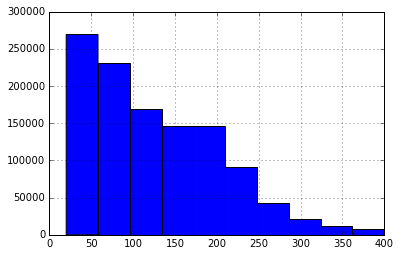

In [49]:
bbres.sqft_price_res.hist()

In [50]:
bbres.shape

(1135830, 460)

In [4]:
bb.to_csv('buildings_fullv.csv')

In [2]:
orca.run(["build_networks"])
orca.run(["neighborhood_vars"])

Running step 'build_networks'
Time to execute step 'build_networks': 40.79 s
Total time to execute iteration 1 with iteration value None: 40.79 s
Running step 'neighborhood_vars'
Computing accessibility variables
Computing sum_residential_units
Removed 164 rows because they contain missing values
Computing sum_nonresidential_units
Removed 164 rows because they contain missing values
Computing ave_unit_sqft
Removed 42 rows because they contain missing values
Computing ave_lot_sqft
Removed 164 rows because they contain missing values
Computing population
Computing households
Computing midinc_hhs
Computing lowinc_hhs
Computing highinc_hhs
Computing race_1_hhs
Computing race_2_hhs
Computing race_3_hhs
Computing race_4_hhs
Computing hhs_with_children
Computing sfdu
Computing hhsize
Computing ave_income
Computing residential
Removed 42 rows because they contain missing values
Computing retail
Removed 3 rows because they contain missing values
Computing office
Removed 4 rows because they cont

In [3]:
orca.list_tables()

['travel_data',
 'tazcounts2015gq',
 'zones',
 'large_areas',
 'access_drive_minutes',
 'nodes_drv',
 'tazcounts2020gq',
 'tazcounts2035gq',
 'employment_sectors',
 'households',
 'annual_employment_control_totals',
 'annual_relocation_rates_for_households',
 'nodes',
 'building_types',
 'buildings',
 'jobs',
 'tazcounts2030gq',
 'access_walk_feet',
 'tazcounts2040gq',
 'zoning',
 'persons',
 'annual_household_control_totals',
 'cities',
 'annual_relocation_rates_for_jobs',
 'counties',
 'land_use_types',
 'target_vacancies',
 'home_based_status',
 'transit_stops',
 'nodes_walk',
 'tazcounts2025gq',
 'scheduled_development_events',
 'building_sqft_per_job',
 'parcels']

# Variables converted from OPUS(urbansim1) to ORCA(urbansim2)

In [35]:
#building type dummy variables (derived from building types table,we have 27 building types)
df=pd.get_dummies(orca.merge_tables(target='buildings', tables=['building_types', 'buildings'], 
                            columns=["building_type_name "])["building_type_name "]).astype(bool)
df.columns = ["type_is_" + i.strip().replace(" ",'_') for i in df.columns]



B_ln_nonres_sqft = np.log( orca.get_table('buildings').to_frame('non_residential_sqft')['non_residential_sqft'] )
B_ln_sqft = np.log( orca.get_table('buildings').to_frame('building_sqft')['building_sqft'] )
B_ln_land_area = np.log( orca.get_table('buildings').to_frame('land_area')['land_area'] )
B_ln_lot_sqft = np.log(orca.get_table('buildings').to_frame('parcel_sqft')['parcel_sqft'])
B_ln_sqft_unit = np.log( orca.get_table('buildings').to_frame('sqft_per_unit')['sqft_per_unit'] ) 
B_building_age = 2015 - orca.get_table('buildings').to_frame('year_built')['year_built']  #in simulation , use iter_var instead of 2015
B_far=orca.merge_tables(target='buildings', tables=['parcels', 'buildings'], 
                            columns=["parcel_far"])["parcel_far"]
B_ln_invfar = -np.log(B_far)
B_is_pre_1945 = orca.get_table('buildings').to_frame('year_built')['year_built'] < 1945,
B_is_newerthan2010 = orca.get_table('buildings').to_frame('year_built')['year_built'] > 2010,
B_sqft_price = orca.get_table('buildings').to_frame('sqft_price_nonres')['sqft_price_nonres']
B_ln_sqft_price = np.log( B_sqft_price )

Z_jobs=orca.get_table('zones').to_frame('employment')['employment']
Z_households=orca.get_table('zones').to_frame('households')['households']
Z_ln_empden = np.log(orca.get_table('zones').to_frame('empden')['empden'])
Z_ln_popden = np.log(orca.get_table('zones').to_frame('popden')['popden'])


N_walk_quarter_mile_retail = orca.merge_tables(target='buildings', tables=['nodes_walk', 'buildings'], 
                            columns=["retail_jobs"])["retail_jobs"]
N_ln_avginc = orca.merge_tables(target='buildings', tables=['nodes_walk', 'buildings'], 
                            columns=["ave_income"])["ave_income"]
N_nonres_ave_price = orca.merge_tables(target='buildings', tables=['nodes_walk', 'buildings'], 
                            columns=["ave_nonres_sqft_price"])["ave_nonres_sqft_price"]

# within quarter mile to transit stops
N_close_to_transit = orca.merge_tables(target='buildings', tables=['nodes_walk', 'buildings'], 
                            columns=["quarter_mile_to_transit"])["quarter_mile_to_transit"]



##########################################
##### updated variables #####


#---- old variables from Feburary -----#

A_job_logsum_worker_ge_car=orca.merge_tables(target='buildings', tables=['zones', 'parcels', 'buildings'], 
                            columns=["logsum_work_more_worker_than_car"])["logsum_work_more_worker_than_car"]
A_job_logsum_worker_lt_car=orca.merge_tables(target='buildings', tables=['zones', 'parcels', 'buildings'], 
                            columns=["logsum_work_less_worker_than_car"])["logsum_work_less_worker_than_car"]
A_pop_logsum_worker_ge_car=orca.merge_tables(target='buildings', tables=['zones', 'parcels', 'buildings'], 
                            columns=["logsum_pop_more_worker_than_car"])["logsum_pop_more_worker_than_car"]
A_pop_logsum_worker_lt_car=orca.merge_tables(target='buildings', tables=['zones', 'parcels', 'buildings'], 
                            columns=["logsum_pop_less_worker_than_car"])["logsum_pop_less_worker_than_car"]
#transit jobs within 45 minutes based on travel model zone-to-zone transit total time
td = orca.get_table('travel_data').to_frame('am_total_transit_time_walk').reset_index()
zemp = orca.get_table('zones').to_frame('employment')
temp = pd.merge(td,zemp, left_on = 'to_zone_id', right_index = True, how='left' )
A_transit_jobs_45min = temp[temp.am_total_transit_time_walk <=45].groupby('from_zone_id').employment.sum()





#---- new definition by March 22nd-----#
A_job_logsum_high_income=orca.merge_tables(target='buildings', tables=['zones', 'parcels', 'buildings'], 
                            columns=["logsum_pop_high_income"])["logsum_pop_high_income"]
A_job_logsum_low_income=orca.merge_tables(target='buildings', tables=['zones', 'parcels', 'buildings'], 
                            columns=["logsum_pop_low_income"])["logsum_pop_low_income"]
A_pop_logsum_high_income=orca.merge_tables(target='buildings', tables=['zones', 'parcels', 'buildings'], 
                            columns=["logsum_pop_high_income"])["logsum_pop_high_income"]
A_pop_logsum_low_income=orca.merge_tables(target='buildings', tables=['zones', 'parcels', 'buildings'], 
                            columns=["logsum_pop_low_income"])["logsum_pop_low_income"]
#transit jobs within 50 minutes based on travel model zone-to-zone transit total time
@orca.column('zones')
def A_ln_emp_50min_transit(zones, travel_data):
    transittime = travel_data.to_frame("am_transit_total_time").reset_index()
    zemp = zones.to_frame('employment')
    temp = pd.merge(transittime,zemp, left_on = 'to_zone_id', right_index = True, how='left' )
    return np.log1p(temp[temp.am_transit_total_time <=50].groupby('from_zone_id').employment.sum().fillna(0))


# Variables haven't been converted from OPUS(urbansim1) to ORCA(urbansim2)

In [ ]:
#description: from OPUS(urbansim1) job_X_building interaction, summarization on number of jobs in the buildings that are in the same sector as the new jobs (chooser)
B_same_sector_emp_in_bldg = urbansim_parcel.job_x_building.same_sector_employment_in_building,
    
#description: from OPUS job_X_building,the ratio of same sector jobs vs total jobs in the building    
B_sector_density_in_building = (urbansim_parcel.job_x_building.same_sector_employment_in_building)/
    (urbansim_parcel.building.number_of_non_home_based_jobs),
     
# number of jobs by sector vs total jobs at building level. total 18 sectors
B_bldg_empratio_1 = urbansim_parcel.building.number_of_jobs_of_sector_1/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_2 = urbansim_parcel.building.number_of_jobs_of_sector_2/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_3 = urbansim_parcel.building.number_of_jobs_of_sector_3/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_4 = urbansim_parcel.building.number_of_jobs_of_sector_4/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_5 = urbansim_parcel.building.number_of_jobs_of_sector_5/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_6 = urbansim_parcel.building.number_of_jobs_of_sector_6/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_7 = urbansim_parcel.building.number_of_jobs_of_sector_7/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_8 = urbansim_parcel.building.number_of_jobs_of_sector_8/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_9 = urbansim_parcel.building.number_of_jobs_of_sector_9/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_10 = urbansim_parcel.building.number_of_jobs_of_sector_10/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_11 = urbansim_parcel.building.number_of_jobs_of_sector_11/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_12 = urbansim_parcel.building.number_of_jobs_of_sector_12/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_13 = urbansim_parcel.building.number_of_jobs_of_sector_13/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_14 = urbansim_parcel.building.number_of_jobs_of_sector_14/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_15 = urbansim_parcel.building.number_of_jobs_of_sector_15/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_16 = urbansim_parcel.building.number_of_jobs_of_sector_16/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_17 = urbansim_parcel.building.number_of_jobs_of_sector_17/urbansim_parcel.building.number_of_jobs
B_bldg_empratio_18 = urbansim_parcel.building.number_of_jobs_of_sector_18/urbansim_parcel.building.number_of_jobs


# zonal employment density by sector. this could be replaced by employment accessibility indicators
Z_ln_zone_empden_1 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_1)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_2 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_2)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_3 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_3)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_4 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_4)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_5 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_5)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_6 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_6)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_7 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_7)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_8 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_8)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_9 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_9)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_10 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_10)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_11 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_11)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_12 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_12)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_13 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_13)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_14 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_14)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_15 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_15)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_16 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_16)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_17 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_17)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))
Z_ln_zone_empden_18 = ln(building.disaggregate(urbansim_parcel.zone.number_of_jobs_of_sector_18)
                      /building.disaggregate(zone.aggregate(parcel.parcel_sqft)/43560.0))

# variables for future test

In [ ]:
======================================================================


# N_auto_30min_jobs = orca.merge_tables(target='buildings', tables=['nodes_drv','buildings'], 
#                             columns=["drv_30min_jobs"])["drv_30min_jobs"]
# N_auto_45min_jobs = orca.merge_tables(target='buildings', tables=['nodes_drv','buildings'], 
#                             columns=["drv_45min_jobs"])["drv_45min_jobs"]
# N_auto_60min_jobs = orca.merge_tables(target='buildings', tables=['nodes_drv','buildings'], 
#                             columns=["drv_60min_jobs"])["drv_60min_jobs"]
# N_auto_10min_pop = orca.merge_tables(target='buildings', tables=['nodes_drv','buildings'], 
#                             columns=["drv_30min_jobs"])["drv_30min_jobs"]
# N_auto_20min_pop = orca.merge_tables(target='buildings', tables=['nodes_drv','buildings'], 
#                             columns=["drv_45min_jobs"])["drv_45min_jobs"]
# N_auto_10min_retail = orca.merge_tables(target='buildings', tables=['nodes_drv','buildings'], 
#                             columns=["drv_10min_retail_jobs"])["drv_10min_retail_jobs"]